# YOLO Face Detector - YOLOFace
- https://github.com/sthanhng/yoloface

## Clone YOLOFace github into /content/yoloface

In [0]:
!git clone https://github.com/sthanhng/yoloface.git

Cloning into 'yoloface'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 155 (delta 0), reused 0 (delta 0), pack-reused 152
Receiving objects: 100% (155/155), 1.40 MiB | 8.99 MiB/s, done.
Resolving deltas: 100% (59/59), done.


## Load model and weight

In [0]:
!bash yoloface/model-weights/get_models.sh

*** Downloading the trained models...
will be placed in the single file you specified.

--2019-10-08 17:02:16--  https://docs.google.com/uc?export=download&confirm=ZZiD&id=13gFDLFhhBqwMw6gf8jVUvNDH2UrgCCrX
Resolving docs.google.com (docs.google.com)... 108.177.111.102, 108.177.111.101, 108.177.111.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.111.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3qudb7vr8c886n7jptn1q5ud8bsplfc8/1570550400000/08669234846404299145/*/13gFDLFhhBqwMw6gf8jVUvNDH2UrgCCrX?e=download [following]
--2019-10-08 17:02:16--  https://doc-10-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3qudb7vr8c886n7jptn1q5ud8bsplfc8/1570550400000/08669234846404299145/*/13gFDLFhhBqwMw6gf8jVUvNDH2UrgCCrX?e=download
Resolving doc-10-5o-docs.googleusercontent.com (doc-10-5o-docs.googleusercontent.com).

## yoloface functions

In [0]:
import sys
import os

import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

import cv2
import numpy as np
import math

from yoloface.utils import *

#yoloface
loc = 'yoloface/'
model_cfg = loc + 'cfg/yolov3-face.cfg'
model_weights = 'model-weights/yolov3-wider_16000.weights'

def read_image_url(img_url):
  response = requests.get(img_url)
  img = Image.open(BytesIO(response.content))
  img = np.array(img)
  
  return img

def show_img(img):
  plt.figure(figsize=(10,10))
  plt.imshow(img)
  plt.show()  

def yolo_face(img_face):

  # Give the configuration and weight files for the model and load the network
  # using them.
  net = cv2.dnn.readNetFromDarknet(model_cfg, model_weights)
  net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
  net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

  # Create a 4D blob from an image.
  blob = cv2.dnn.blobFromImage(img_face, 1 / 255, (IMG_WIDTH, IMG_HEIGHT),
                               [0, 0, 0], 1, crop=False)
  # Sets the input to the network
  net.setInput(blob)
  
  # Runs the forward pass to get output of the output layers
  outs = net.forward(get_outputs_names(net))

  # Remove the bounding boxes with low confidence
  faces = post_process(img_face, outs, CONF_THRESHOLD, NMS_THRESHOLD)
  print('detected faces: {}'.format(len(faces)))
  print('#' * 40)
  
  # initialize the set of information we'll displaying on the frame
  info = [
          ('number of faces detected', '{}'.format(len(faces)))
  ]
  
  font = cv2.FONT_HERSHEY_PLAIN
  #font = cv2.FONT_HERSHEY_SIMPLEX
  
  for (i, (txt, val)) in enumerate(info):
    text = '{}: {}'.format(txt, val)
    #cv2.putText(img_face, text, (100, 100),
    #            font, 5, COLOR_RED, 3)
    cv2.putText(img_face, text, (10, (i * 20) + 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, COLOR_RED, 2)
    
  return img_face, faces 

def crop_face(img, faces):
  num_faces = len(faces)
  r = math.floor(math.sqrt(num_faces))
  c = math.ceil(math.sqrt(num_faces))

  #x,y,w,h = faces[1]
  #plt.imshow(img[y:y+h, x:x+w])
  #plt.show()
    
  try:
    for i in range(0, len(faces)):
      x,y,w,h = faces[i]
      plt.axis('off')
      plt.subplot(r, c, i+1)
      plt.imshow(img[y:y+h, x:x+w])
    plt.show()
  except:
    pass

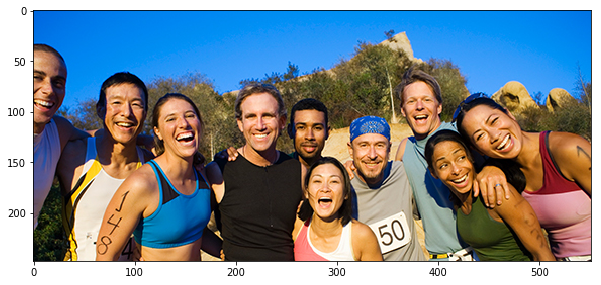

detected faces: 10
########################################


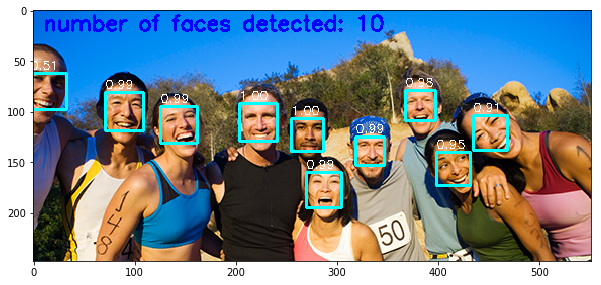

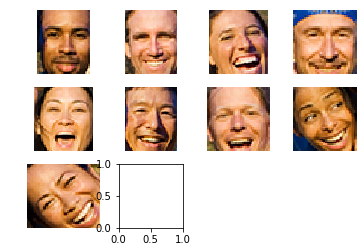

In [139]:
#img_url = 'https://peopledotcom.files.wordpress.com/2018/12/books-8.jpg'
img_url = 'https://ichef.bbci.co.uk/news/660/cpsprodpb/147CE/production/_106081938_gettyimages-919536292.jpg'
img_url = 'https://oralcancerfoundation.org/wp-content/uploads/2016/03/people.jpg'
img = read_image_url(img_url)
img_tmp = np.copy(img)
show_img(img)

img_face, faces = yolo_face(img)
show_img(img_face)
crop_face(img_tmp, faces)

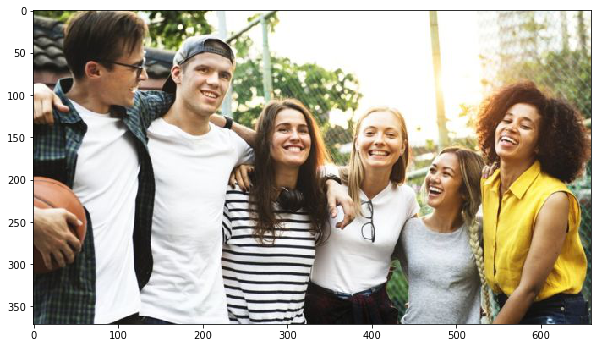

detected faces: 6
########################################


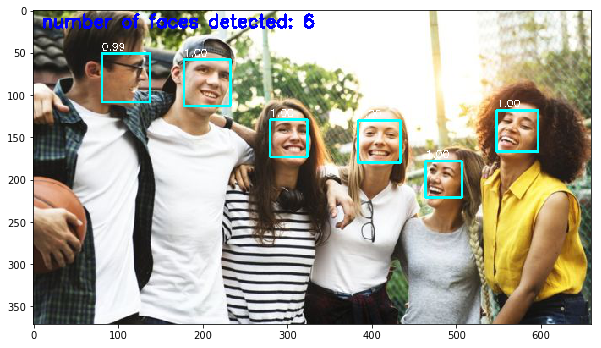

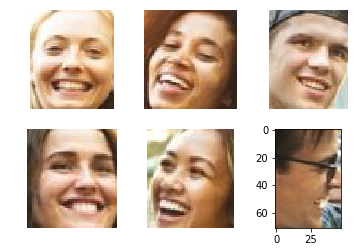

In [140]:
#img_url = 'https://peopledotcom.files.wordpress.com/2018/12/books-8.jpg'
img_url = 'https://ichef.bbci.co.uk/news/660/cpsprodpb/147CE/production/_106081938_gettyimages-919536292.jpg'
img = read_image_url(img_url)
img_tmp = np.copy(img)
show_img(img)

img_face, faces = yolo_face(img)
show_img(img_face)
crop_face(img_tmp, faces)

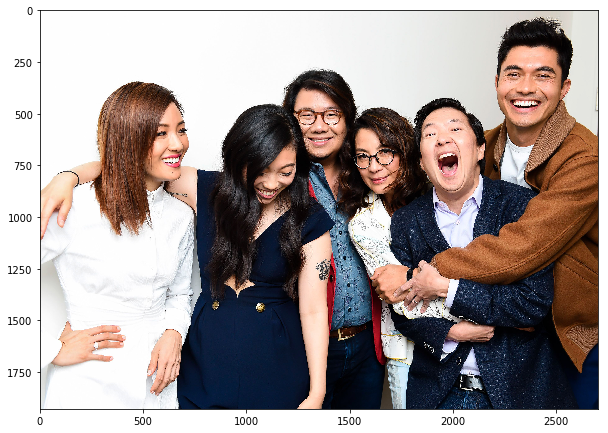

detected faces: 6
########################################


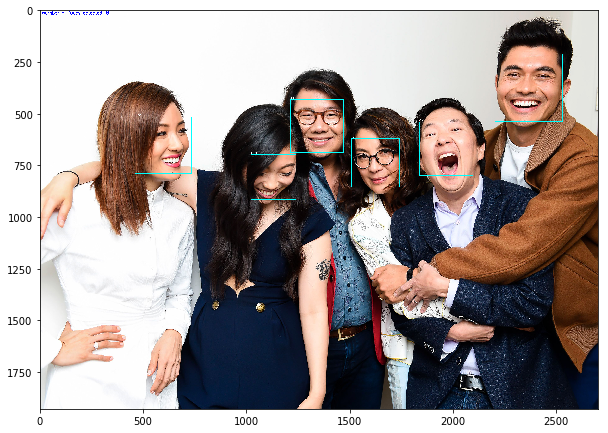

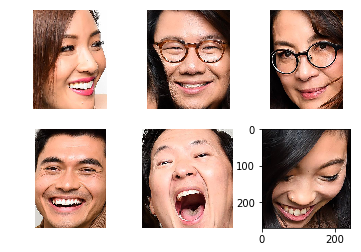

In [141]:
img_url = 'https://peopledotcom.files.wordpress.com/2018/12/books-8.jpg'
img = read_image_url(img_url)
img_tmp = np.copy(img)
show_img(img)

img_face, faces = yolo_face(img)
show_img(img_face)
crop_face(img_tmp, faces)

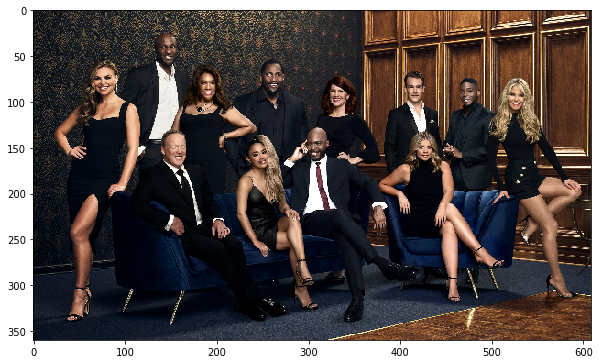

detected faces: 12
########################################


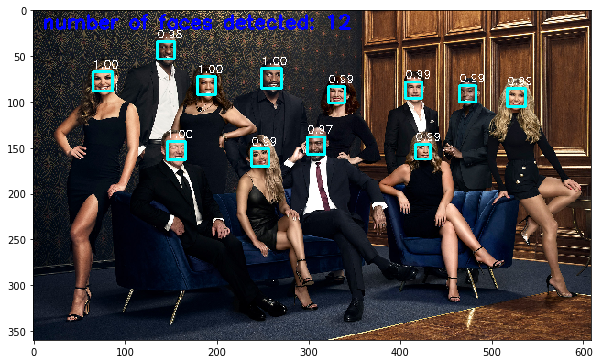

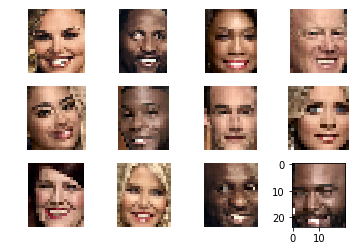

In [142]:
img_url = 'https://peopledotcom.files.wordpress.com/2019/08/152982_1195_r1.jpg'
img = read_image_url(img_url)
img = cv2.resize(img, None, fx=0.2, fy=0.2)
img_tmp = np.copy(img)
show_img(img)

img_face, faces = yolo_face(img)
show_img(img_face)
crop_face(img_tmp, faces)

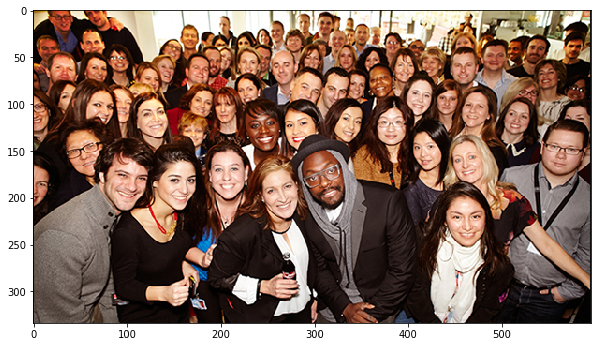

detected faces: 55
########################################


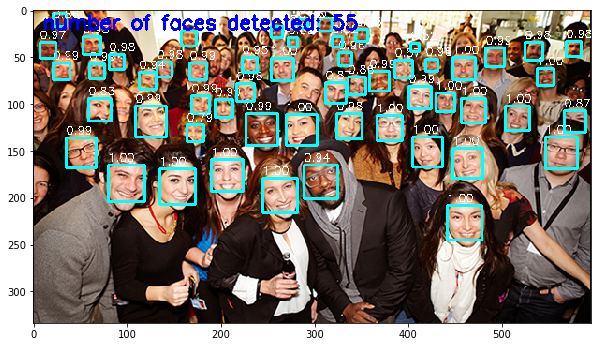

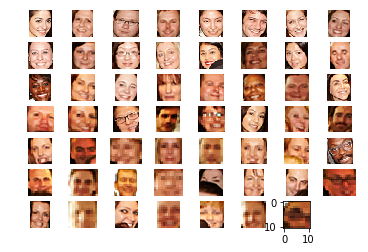

In [143]:
img_url = 'http://www.coca-cola.co.uk/content/dam/journey/gb/en/hidden/About-us/596x334/william_coke_london_596x334.jpg'
img = read_image_url(img_url)
img_tmp = np.copy(img)
show_img(img)

img_face, faces = yolo_face(img)
show_img(img_face)
crop_face(img_tmp, faces)